# Benchmarking GFLOPS with pywren and lambda


In [1]:
%pylab inline

# STANDARD LIBRARY IMPORT
import numpy as np
import time
import pandas as pd
import pickle
import seaborn as sns
sns.set_style('whitegrid')

# PYTHON FILE
import flops_benchmark

Populating the interactive namespace from numpy and matplotlib


# Getting Started 

We are going to benchmark the simple function below, which simply generates two matrices and computes their matrix (dot) product. The matrices are of size `MAT_N` and we will compute the product `loopcount` times. 

In [2]:

# PARAM loopcount: INT, NUMBER OF ITERATIONS FOR DOT PRODUCT ON MATRICES
# PARAM MAT_N: INT, SIZE OF MATRICES
def compute_flops(loopcount, MAT_N):
    
    # CREATE A NUMPY ARRAY OF DOUBLE THE SIZE MAT_N 
    # RESHAPE THE 1D ARRAY TO A 2D ARRAY OF LENGTH MAT_N
    A = np.arange(MAT_N**2, dtype=np.float64).reshape(MAT_N, MAT_N)
    
    
    # CREATE A NUMPY ARRAY OF DOUBLE THE SIZE MAT_N 
    # RESHAPE THE 1D ARRAY TO A 2D ARRAY OF LENGTH MAT_N
    B = np.arange(MAT_N**2, dtype=np.float64).reshape(MAT_N, MAT_N)
    
    # GET THE TIME IN SECONDS SINCE THE EPOCH
    t1 = time.time()
    
    # PERFORM THE DOT PRODUCT ON THE TWO 2D ARRAYS FOR loopcount ITERATIONS
    # NOTE: WE'RE JUST INTERESTED IN HOW LONG IT TAKES TO PERFORM THE COMPUTATION
    #       NOT THE ACTUAL VALUES
    for i in range(loopcount):
        c = np.sum(np.dot(A, B))

    # FLOATING-POINT OPERATIONS PER SECOND
    FLOPS = 2 *  MAT_N**3 * loopcount
    
    # GET THE TIME IN SECONDS SINCE EPOCH
    t2 = time.time()
    
    # RETURN THE AVERAGE RATE 
    return FLOPS / (t2-t1)



All of the actual benchmark code is in a stand-alone python file, which you can call as follows. It places the output in `small.pickle`

In [3]:
# WORKERS: NUMBER OF WORKDS
# LOOPCOUNT: NUMBER OF MATMULS TO DO
# MATN: SIZE OF MATRIX
# OUTFILE: WHERE TO PLACE THE SAVE DATA

!python flops_benchmark.py --workers=15 --loopcount=10 --matn=1024 --outfile="small.pickle"

invocation done, dur= 14.27163028717041
callset id:  5e57bc4a-3980-40b8-8b3d-0bd6578ac297
total time 37.60903453826904
8.565031013285504 GFLOPS


We can plot a histogram of the results: 

In [4]:
# DESERIALIZE FILE, STORE A DICTIONARY
exp_results = pickle.load(open("small.pickle", 'rb'))

# FLOPS_BENCHMARK IS THE PYTHON FILE
# METHOD IS CALL TO RETURN A DATAFRAME USING THE DICTIONARY AS THE PARAMETER
results_df = flops_benchmark.results_to_dataframe(exp_results)


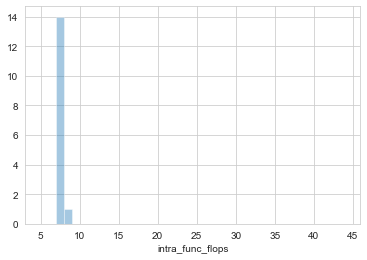

In [5]:
# A HISTOGRAPH WITH NO KERNAL DENSITY ESTIMATE  
sns.distplot(results_df.intra_func_flops/1e9, bins=np.arange(5, 45), kde=False)

# scaling up
Now we will run a very large number of lambdas simultaneously. Note that this is very dependent on the maximum number of simultaneous lambdas that AWS has enabled for your account. You can e-mail them and ask for a limit increase. Note that due to stragglers this can also take a while

In [6]:
# My account has a lambda limit of 3000 simultaneous lambdas, so I'm using 2800 to give us some headroom

# WORKERS: NUMBER OF WORKDS
# LOOPCOUNT: NUMBER OF MATRIX MULTIPLICATIONS TO DO
# MATN: SIZE OF MATRIX
# OUTFILE: WHERE TO PLACE THE SAVE DATA
!python flops_benchmark.py --workers=1000 --loopcount=10 --matn=4096 --outfile="big.pickle"

invocation done, dur= 95.55420398712158
callset id:  f4154a74-5460-4fc4-8d30-d4544bebd8b1
total time 287.4371404647827
4781.530780947887 GFLOPS


,aws_request_id,call_id,callset_id,data_key,end_time,exception,exec_time,free_disk_bytes,func_key,host_submit_time,...,runtime_url,status_done_timestamp,status_query_count,storage_config,use_cached_runtime,intra_func_flops,workers,loopcount,MATN,est_flops
0,89726b7a-2644-4cc3-b0bf-842daa42f07f,00000,f4154a74-5460-4fc4-8d30-d4544bebd8b1,pywren.jobs/f4154a74-5460-4fc4-8d30-d4544bebd8...,1.568933e+09,None,179.309376,538333184,pywren.jobs/f4154a74-5460-4fc4-8d30-d4544bebd8...,1.568932e+09,...,s3://pywren-runtimes-public-us-west-2/02e4bb-p...,1.568933e+09,1,"{'storage_backend': 's3', 'storage_prefix': 'p...",True,7.738067e+09,1000,10,4096,1.374390e+12
1,81e60ed0-72d5-4414-bb33-a69cde96f8cc,00001,f4154a74-5460-4fc4-8d30-d4544bebd8b1,pywren.jobs/f4154a74-5460-4fc4-8d30-d4544bebd8...,1.568933e+09,None,182.072499,538333184,pywren.jobs/f4154a74-5460-4fc4-8d30-d4544bebd8...,1.568932e+09,...,s3://pywren-runtimes-public-us-west-2/d249ed-p...,1.568933e+09,1,"{'storage_backend': 's3', 'storage_prefix': 'p...",True,7.679883e+09,1000,10,4096,1.374390e+12
2,f025c5f3-3888-4221-80f9-2fec7f7f3d6c,00002,f4154a74-5460-4fc4-8d30-d4544bebd8b1,pywren.jobs/f4154a74-5460-4fc4-8d30-d4544bebd8...,1.568933e+09,None,179.962964,9142272,pywren.jobs/f4154a74-5460-4fc4-8d30-d4544bebd8...,1.568932e+09,...,s3://pywren-runtimes-public-us-west-2/d249ed-p...,1.568933e+09,1,"{'storage_backend': 's3', 'storage_prefix': 'p...",True,7.724197e+09,1000,10,4096,1.374390e+12
3,60c2d92d-98a2-4c70-8882-9ccc5a29d937,00003,f4154a74-5460-4fc4-8d30-d4544bebd8b1,pywren.jobs/f4154a74-5460-4fc4-8d30-d4544bebd8...,1.568933e+09,None,181.272091,9142272,pywren.jobs/f4154a74-5460-4fc4-8d30-d4544bebd8...,1.568932e+09,...,s3://pywren-runtimes-public-us-west-2/d249ed-p...,1.568933e+09,1,"{'storage_backend': 's3', 'storage_prefix': 'p...",True,7.674725e+09,1000,10,4096,1.374390e+12
4,2fed7518-58b4-48b7-a51f-02d53221315e,00004,f4154a74-5460-4fc4-8d30-d4544bebd8b1,pywren.jobs/f4154a74-5460-4fc4-8d30-d4544bebd8...,1.568933e+09,None,179.469512,9142272,pywren.jobs/f4154a74-5460-4fc4-8d30-d4544bebd8...,1.568932e+09,...,s3://pywren-runtimes-public-us-west-2/f2aa7a-p...,1.568933e+09,1,"{'storage_backend': 's3', 'storage_prefix': 'p...",True,7.736397e+09,1000,10,4096,1.374390e+12


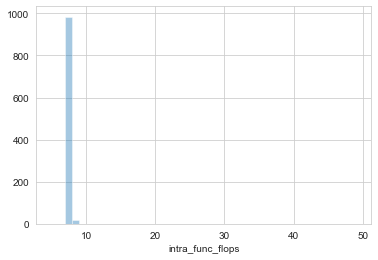

In [7]:
# DESERIALIZE FILE, STORE A DICTIONARY
big_exp_results = pickle.load(open("big.pickle", 'rb'))

# FLOPS_BENCHMARK IS THE PYTHON FILE
# METHOD IS CALL TO RETURN A DATAFRAME USING THE DICTIONARY AS THE PARAMETER
big_results_df = flops_benchmark.results_to_dataframe(big_exp_results)

# SHOW THE FIRST FIVE ROWS OF THE DATAFRAME
display(big_results_df.head())

# A HISTOGRAPH WITH NO KERNAL DENSITY ESTIMATE  
sns.distplot(big_results_df.intra_func_flops/1e9, bins=np.arange(5, 50), kde=False)

In [8]:
# GET THE ESTIMATED TOTAL FLOPS
est_total_flops = big_results_df['est_flops']

# GET THE TOTAL NUMBER OF JOBS
total_jobs = len(big_results_df)

# GET JOBS PER FLOP
JOB_GFLOPS = est_total_flops /1e9 /total_jobs 

In [9]:
# GRID JOBS RUNNING TIME

# GET THE MINIMUM HOST_SUBMIT_TIME 
time_offset = np.min(big_results_df.host_submit_time)

# GET THE MAXIMUM DOWNLOAD_OUTPUT_STAMPT
# THEN SUBTRACT BY THE TIME_OFFSET
# MAX_TIME SAVES THE TIME IT TOOK TO GET THE JOB DONE
max_time = np.max(big_results_df.download_output_timestamp ) - time_offset

# CREATES AN ARRAY WITH EVENLY SPACED OUT VALUES BETWEEN O TO MAX_TIME
runtime_bins = np.linspace(0, max_time, np.int(max_time), endpoint=False)

# CREATE AN ARRAY WITH EVENLY SPACED OUT VALUES BETWEEN LENGTH BIG_RESULTS_DF TO LENGTH RUNTIME_BINS
runtime_flops_hist = np.zeros((len(big_results_df), len(runtime_bins)))

# ITERATE THROUGH EACH ROW IN THE DATAFRAME
for i in range(len(big_results_df)):
    # GET THE A ROW IN INDEX I 
    row = big_results_df.iloc[i]
    
    # STORES THE TIME IT TOOK TO GET STARTED
    s = (row.start_time + row.setup_time) - time_offset
    
    # STORES THE TIME IT TOOK TO GET THE JOB DONE
    e = row.end_time - time_offset
    
    #FIND INDICES WHERE ELMENETS SHOULD BE INSERTED TO MAINTAIN ORDER
    a, b = np.searchsorted(runtime_bins, [s, e])
    
    #CHECK IF INDEX B - INDEX A IS GREATER THAN ZERO
    if b-a > 0:
        runtime_flops_hist[i, a:b] = row.est_flops / float(b-a)
        
# STORES A DATA FRAME WITH SORTED VALUES BASED ON ENDTIME     
results_by_endtime = big_results_df.sort_values('download_output_timestamp')

# CREATE A NEW COLUM
# SAVE RESULTS AS JOB_ENDTIME
results_by_endtime['job_endtime_zeroed'] = big_results_df.download_output_timestamp - time_offset

# CREATE A NEW COLUMN
# SAVE THE SUM OF THE COLUMNS OF ALL ESTIMATED FLOPS
results_by_endtime['flops_done'] = results_by_endtime.est_flops.cumsum()

# CREATE A NEW COLUMN
# SAVE RESULTS FOR THE FLOP RATE
results_by_endtime['rolling_flops_rate'] = results_by_endtime.flops_done/results_by_endtime.job_endtime_zeroed


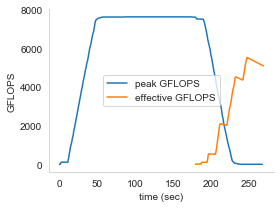

In [10]:

# SET THE FIGURE SIZE FOR THE GRAPH  
# KEEP REFERENCE IN VARIABLE
fig = pylab.figure(figsize=(4, 3))

#PLACE FIGURE IN ROW 1 COL 1 INDEX 1
ax = fig.add_subplot(1, 1, 1)

# PLOT A LINE GRAPH: RUNTIME_FLOPS_HIST VS TIME
ax.plot(runtime_flops_hist.sum(axis=0)/1e9, label='peak GFLOPS')

# PLOT A LINE GRAPH: ROLLING_FLOP_RATE VS TIME
ax.plot(results_by_endtime.job_endtime_zeroed, 
        results_by_endtime.rolling_flops_rate/1e9, label='effective GFLOPS')

# CHANGE X-AXIS LABEL
ax.set_xlabel('time (sec)')

# CHANGE Y-AXIS LABEL
ax.set_ylabel("GFLOPS")

# SHOWS A LEGEND (DEFAULT: TOP LEFT)
pylab.legend()

# DOES NOT SHOW GRID
ax.grid(False)

#DOES NOT SHOW THE TOP AND RIGHT BORDERS OF THE FIGURE
sns.despine()

# AUTOMATICALLY ADJUST SUBPLOT PADDING
fig.tight_layout()

#SAVE FIGURE AS A PNG
fig.savefig("flops_benchmark.gflops.png")

This plot computes two things:
* **Peak GLFOPS**: Across all cores, what is the total simultaneous FLOPS that are being computed? 
* **Effective GFLOPS**: If the job ended at this point in time, what would our aggregate effective GFLOPS have been, including time to launch the jobs and download the results

We see "peak GFLOPS" peaks in the middle of the job, when all 2800 lambdas are running at once. "Effective GFLOPS" starts climbing as results quickly return, but stragglers mean that in reality our total effective GFLOPS for the job is only ~20GFLOPS. Still not bad for pure python! 